In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
allegations = pd.read_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Totals/allegations.csv", low_memory=False)

In [76]:
allegations.columns

Index(['CRID', 'OfficerID', 'OfficeFirst', 'OfficerLast', 'AllegationCode',
       'Category', 'Allegation', 'RecommendedFinding', 'RecommendedOutcome',
       'FinalFinding', 'FinalOutcome', 'Finding', 'Outcome', 'Beat',
       'Location', 'Add1', 'Add2', 'City', 'IncidentDate', 'StartDate',
       'EndDate', 'InvestigatorName', 'InvestigatorRank', 'Latitude',
       'Longitude'],
      dtype='object')

In [77]:
# separate file into 2 dataframes, one from 2010 to 2014, one from 2015 to 2016
# Train
allegations_train = allegations[allegations['IncidentDate'] < '2015-01-01']

In [78]:
# Test
allegations_test = allegations[allegations['IncidentDate'] >= '2015-01-01']

In [79]:
# count number of times beat appears in each dataframe using value_counts()
beat_count_train = allegations_train['Beat'].value_counts()
beat_count_test = allegations_test['Beat'].value_counts()

In [80]:
print(beat_count_train)

621.0     426
531.0     425
1134.0    405
713.0     344
3100.0    327
         ... 
235.0      14
2032.0     11
1653.0     10
1652.0      2
1655.0      2
Name: Beat, Length: 275, dtype: int64


In [81]:
# Get OfficerID of train and test dataframes
officers_train = allegations_train['OfficerID'].unique()
officers_test = allegations_test['OfficerID'].unique()
# make into dataframe
officers_train = pd.DataFrame(officers_train)
officers_test = pd.DataFrame(officers_test)

In [82]:
# Get officer Profile
ten = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2010_allegation.xlsx')
eleven = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis//Data/Website/2011_allegation.xlsx')
twelve = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2012_allegation.xlsx')
thirteen = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2013_allegation.xlsx')
fourteen = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2014_allegation.xlsx')
fifteen = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2015_allegation.xlsx')
sixteen = pd.ExcelFile('/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Website/2016_allegation.xlsx')

In [83]:
officer_profile_10 = ten.parse('Officer Profile')
officer_profile_11 = eleven.parse('Officer Profile')
officer_profile_12 = twelve.parse('Officer Profile')
officer_profile_13 = thirteen.parse('Officer Profile')
officer_profile_14 = fourteen.parse('Officer Profile')
officer_profile_15 = fifteen.parse('Officer Profile')
officer_profile_16 = sixteen.parse('Officer Profile')

In [84]:
# Make officer_profile_10 to 14 into one dataframe, 15 to 16 into another
officer_profile_train = pd.concat([officer_profile_10, officer_profile_11, officer_profile_12, officer_profile_13, officer_profile_14])
officer_profile_test = pd.concat([officer_profile_15, officer_profile_16])

In [85]:
# Using Officer ID, find duplicates and then delete the duplicates
officer_profile_train.dropna()
officer_profile_test.dropna()
officer_profile_train = officer_profile_train.drop_duplicates(subset='OfficerID', keep='first')
officer_profile_test = officer_profile_test.drop_duplicates(subset='OfficerID', keep='first')

In [86]:
officer_profile_train.shape, officer_profile_test.shape

((8905, 10), (4409, 10))

In [87]:
# Add Beat to Officer Profile
officer_profile_train['Beat'] = officer_profile_train['OfficerID'].map(allegations_train['Beat'])
officer_profile_test['Beat'] = officer_profile_test['OfficerID'].map(allegations_test['Beat'])

In [89]:
# Add beat count to officer_profile_train and officer_profile_test
# Count number of times beat appears in each dataframe using value_counts()
# Then add to each officer's beatcount column
beat_count_train = pd.DataFrame(allegations_train['Beat'].value_counts())
beat_count_test = pd.DataFrame(allegations_test['Beat'].value_counts())
# map counts to officers corresponding to their beats
officer_profile_train['BeatCount'] = officer_profile_train['Beat'].map(beat_count_train['Beat'])
officer_profile_test['BeatCount'] = officer_profile_test['Beat'].map(beat_count_test['Beat'])

In [90]:
print(officer_profile_train)

      OfficerID OfficerFirst  OfficerLast Gender           Race  ApptDate  \
0             1      Jeffery        Aaron      M          White   38621.0   
1             2       Karina        Aaron      F       Hispanic   38621.0   
2             7        Terry       Abbate      M          White   35037.0   
3            13         Dale       Abbott      M          White   30284.0   
4            16         Aziz  Abdelmajeid      M  Asian/Pacific   39566.0   
...         ...          ...          ...    ...            ...       ...   
3320      32271         Paul       Powers      M          White   38012.0   
3325      32289         John       Rivera      M       Hispanic   31733.0   
3349      32360       Donald        Story      M       Hispanic   36752.0   
3360      32387        Oscar   Valenzuela      M       Hispanic   35675.0   
3361      32389        Sarah      Vanthof      F          White   37011.0   

      Unit                Rank  Star  Age    Beat  BeatCount  
0      NaN  

In [91]:
# add num_allegations column to officer_profile_train and officer_profile_test
officer_profile_train['num_allegations'] = 0
officer_profile_test['num_allegations'] = 0

In [92]:
# officer_profile_train.shape, officer_profile_test.shape
print(allegations_train['OfficerID'].value_counts())

23537    33
16551    33
31847    32
32344    30
14442    30
         ..
3420      1
6326      1
28712     1
26909     1
31290     1
Name: OfficerID, Length: 8905, dtype: int64


In [93]:
# from allegations train, get the number of allegations for each officer
for i in range(len(officer_profile_train)):
    officer_profile_train['num_allegations'].iloc[i] = allegations_train['OfficerID'].value_counts().iloc[i]

/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2113664065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officer_profile_train['num_allegations'].iloc[i] = allegations_train['OfficerID'].value_counts().iloc[i]
/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2113664065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officer_profile_train['num_allegations'].iloc[i] = allegations_train['OfficerID'].value_counts().iloc[i]
/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2113664065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [94]:
# from allegations train, get the number of allegations for each officer
for i in range(len(officer_profile_test)):
    officer_profile_test['num_allegations'].iloc[i] = allegations_test['OfficerID'].value_counts().iloc[i]

/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2525402903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officer_profile_test['num_allegations'].iloc[i] = allegations_test['OfficerID'].value_counts().iloc[i]
/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2525402903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officer_profile_test['num_allegations'].iloc[i] = allegations_test['OfficerID'].value_counts().iloc[i]
/var/folders/64/7cc975tn74sb3dg4ztck8zsw0000gn/T/ipykernel_14808/2525402903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [95]:
# Export it to csv
officer_profile_train.to_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/Years/officer_profile_train.csv", index=False)
officer_profile_test.to_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/Years/officer_profile_test.csv", index=False)

In [96]:
# Export allegations_train and allegations_test to csv
allegations_train.to_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/Years/allegations_train.csv", index=False)
allegations_test.to_csv("/Users/jeremyhudsonchan/Dropbox/Files/Boston_College_Courses/Thesis/Data/Processed/Years/allegations_test.csv", index=False)

In [101]:
print(officer_profile_test["num_allegations"].value_counts())

1     2903
2      928
3      324
4      144
5       56
6       25
7       17
8        8
9        3
10       1
Name: num_allegations, dtype: int64


In [105]:
# plot the distribution of number of allegations value counts
plt.hist(officer_profile_test["num_allegations"].value_counts())

KeyError: 0

In [107]:
print(len(officer_profile_train))

8905


(array([26.,  2.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([1.0000e+00, 3.0460e+02, 6.0820e+02, 9.1180e+02, 1.2154e+03,
        1.5190e+03, 1.8226e+03, 2.1262e+03, 2.4298e+03, 2.7334e+03,
        3.0370e+03]),
 <BarContainer object of 10 artists>)

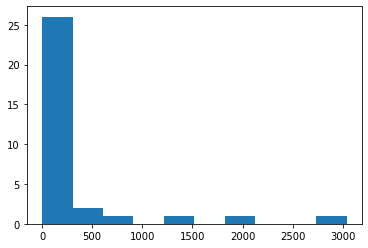

In [108]:
plt.hist(officer_profile_train["num_allegations"].value_counts())

In [113]:
officer_profile_train["num_allegations"].value_counts(normalize=True)

1     0.341044
2     0.208310
3     0.140483
4     0.087142
5     0.061089
6     0.045705
7     0.030882
8     0.018529
9     0.014599
10    0.012914
11    0.008310
12    0.007412
13    0.004941
14    0.003706
15    0.003032
16    0.002583
17    0.001797
19    0.001460
18    0.001235
20    0.001011
21    0.000786
25    0.000561
22    0.000337
23    0.000337
24    0.000337
26    0.000337
27    0.000225
29    0.000225
30    0.000225
33    0.000225
32    0.000112
28    0.000112
Name: num_allegations, dtype: float64